In [105]:
import pandas as pd

In [106]:

df = pd.read_csv('data.csv')


# Save updated data if needed
df.head()



,ReportingDelay,AccidentHour,Age,WeeklyRate,Gender,MaritalStatus,HoursWorkedPerWeek,DependentChildren,DependentsOther,PartTimeFullTime,DaysWorkedPerWeek,DateOfAccident,ClaimDescription,ReportedDay,InitialCaseEstimate,Incurred
0,15,11,28,500.00,M,S,44.0,0,0,F,5,5/10/2005,STRUCK SCAFFOLDING STRAIN LOWER BACK,3Thurs,9500,151.254501
1,22,5,29,500.00,M,S,38.0,0,0,F,5,28/10/2003,STRUCK KNIFE LACERATED LEFT THUMB,2Wed,11500,442.125024
2,22,7,28,197.37,M,M,16.0,0,0,P,3,25/05/2004,SLIPPED AND HIT STRAINED LEFT SHOULDER INJURY ...,2Wed,8000,1494.490505
3,15,12,40,0.00,M,M,0.0,1,0,F,5,21/07/1994,HIT FALLING DOOR LACERATION LEFT SHOULDER INJU...,4Fri,500,138.900000
4,38,12,22,435.70,M,M,38.0,0,0,F,5,9/06/1992,STRUCK FALLING OBJECT LACERATION RIGHT RING FI...,4Fri,320,296.160000


In [107]:
df.shape


(21691, 16)

In [108]:
df.describe()


,ReportingDelay,AccidentHour,Age,WeeklyRate,HoursWorkedPerWeek,DependentChildren,DependentsOther,DaysWorkedPerWeek,InitialCaseEstimate,Incurred
count,21691.000000,21691.000000,21691.000000,21691.000000,21691.000000,21691.000000,21691.000000,21691.000000,21691.000000,2.169100e+04
mean,41.991148,11.505048,34.002951,373.274852,33.792465,0.112720,0.008667,4.908995,6721.948504,9.647973e+03
std,96.169390,3.742078,12.180424,272.689262,18.097107,0.505178,0.101708,0.534661,15014.873847,4.713051e+04
min,0.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.220000e-15
25%,14.000000,9.000000,24.000000,200.000000,38.000000,0.000000,0.000000,5.000000,500.000000,1.802750e+02
50%,22.000000,11.000000,32.000000,364.600000,38.000000,0.000000,0.000000,5.000000,1500.000000,4.959266e+02
75%,42.000000,14.000000,43.000000,500.000000,40.000000,0.000000,0.000000,5.000000,7500.000000,1.827121e+03
max,5360.000000,24.000000,79.000000,5811.300000,700.000000,6.000000,4.000000,7.000000,500000.000000,1.563323e+06


In [109]:
# Check for exact duplicate claim descriptions
duplicate_descriptions = df[df['ClaimDescription'].duplicated(keep=False)]

# View duplicates grouped together
duplicate_groups = duplicate_descriptions.sort_values('ClaimDescription')

# Print count
print(f"Total duplicate claim descriptions: {duplicate_descriptions.shape[0]}")
# Find duplicates based on 'ClaimDescription' and 'Incurred'
duplicates = df[df.duplicated(subset=['ClaimDescription', 'Incurred'], keep=False)]

# Sort and view the duplicates
duplicates = duplicates.sort_values(by=['ClaimDescription', 'Incurred'])

# Print how many such duplicates exist
print(f"Total duplicates based on ClaimDescription and Incurred: {duplicates.shape[0]}")
# Drop duplicates based on just those two columns
df = df.drop_duplicates(subset=['ClaimDescription', 'Incurred'])




Total duplicate claim descriptions: 12412
Total duplicates based on ClaimDescription and Incurred: 10


In [110]:
# Find all duplicate rows (every column matches)
duplicate_rows = df[df.duplicated(keep=False)]

# View them sorted for easier inspection
duplicate_rows = duplicate_rows.sort_values(by=list(df.columns))

# Print total count of duplicates
print(f"Total duplicate rows: {duplicate_rows.shape[0]}")


Total duplicate rows: 0


In [111]:
df.isnull().sum()

ReportingDelay          0
AccidentHour            0
Age                     0
WeeklyRate              0
Gender                  0
MaritalStatus          22
HoursWorkedPerWeek      0
DependentChildren       0
DependentsOther         0
PartTimeFullTime        0
DaysWorkedPerWeek       0
DateOfAccident          0
ClaimDescription        0
ReportedDay             0
InitialCaseEstimate     0
Incurred                0
dtype: int64

Incurred               1.000000
InitialCaseEstimate    0.419224
WeeklyRate             0.134476
Age                    0.089222
HoursWorkedPerWeek     0.044738
DependentsOther        0.025559
DependentChildren      0.015968
ReportingDelay         0.004115
DaysWorkedPerWeek     -0.013002
AccidentHour          -0.019095
Name: Incurred, dtype: float64


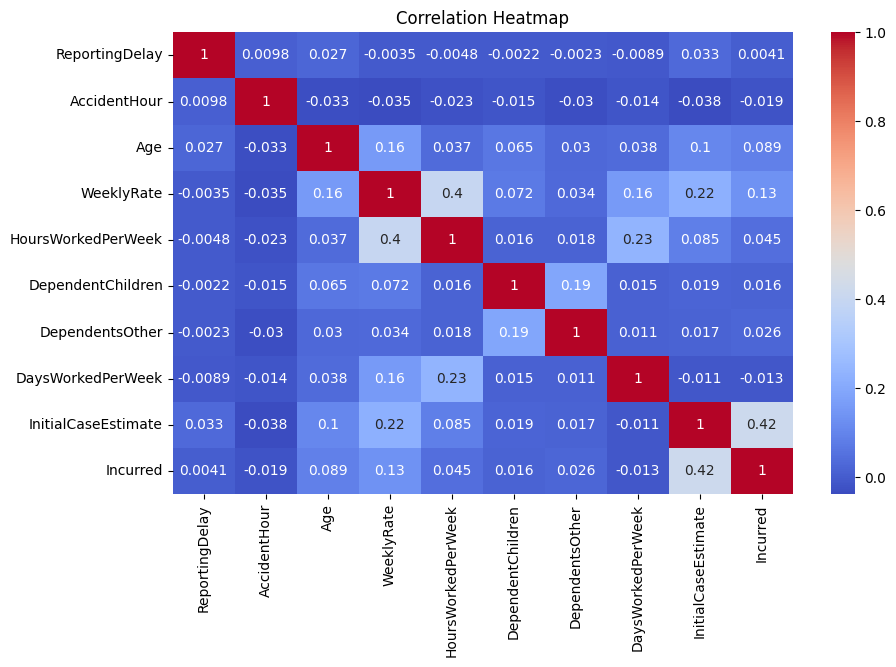

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns
numeric_cols = df.select_dtypes(include='number')

# Correlation matrix
corr_matrix = numeric_cols.corr()

# Correlation with 'Incurred'
corr_with_incurred = corr_matrix['Incurred'].sort_values(ascending=False)
print(corr_with_incurred)

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [113]:
# Top keywords in high-cost claims
high_cost_claims = df[df['Incurred'] > df['Incurred'].quantile(0.75)]
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(stop_words='english', max_features=20)
X = vec.fit_transform(high_cost_claims['ClaimDescription'])

word_freq = pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out()).sum().sort_values(ascending=False)
print(word_freq)


strain        4027
lower         2486
lifting       2095
right         2066
left          1700
shoulder      1044
struck         895
fell           872
injury         798
slipped        751
strained       611
knee           596
laceration     445
wrist          396
neck           389
hand           375
finger         355
floor          331
knife          326
pain           326
dtype: int64


In [114]:
high_cost_claims

,ReportingDelay,AccidentHour,Age,WeeklyRate,Gender,MaritalStatus,HoursWorkedPerWeek,DependentChildren,DependentsOther,PartTimeFullTime,DaysWorkedPerWeek,DateOfAccident,ClaimDescription,ReportedDay,InitialCaseEstimate,Incurred
12,17,10,18,311.46,M,S,38.0,0,0,F,5,20/06/1994,HIT IN STEEL LOWER BACK STRAIN AND KNEE,3Thurs,10824,4063.500000
13,10,8,31,364.60,F,S,35.0,1,0,F,5,4/01/2000,LIFTING RESIDENT LACERATION LEFT ARM LEFT SHOU...,4Fri,27000,5397.722915
15,34,7,24,209.35,M,M,15.0,0,0,P,3,1/04/2004,FELL DOWN LOWER BACK STRAIN LOWER BACK,2Wed,27000,44661.945210
17,11,15,35,200.00,M,M,38.0,0,0,F,5,8/05/2000,LIFTING BACK STRAIN LOWER BACK INJURY NECK,4Fri,51000,2403.967486
31,17,16,40,668.00,M,S,38.5,0,0,F,5,11/11/2003,MOVING FURNITURE LOWER BACK STRAIN,4Fri,35000,35548.464450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21678,17,9,60,650.00,M,U,38.0,0,0,F,5,15/03/1997,CAUGHT ON PIPE BRUISED RIGHT KNEE INJURY,1Tues,1500,23274.342000
21679,4,11,27,500.00,F,S,38.0,1,0,F,5,1/12/2003,SLIPPED ON FLOOR FRACTURE LEFT KNEE STRAIN,4Fri,12000,3358.745895
21682,11,11,40,977.80,M,M,38.0,0,0,F,5,16/01/2003,LIFTING RESIDENT STRAIN RIGHT SHOULDER STRAIN,0Mon,25000,75279.872610
21683,54,11,23,870.10,M,S,40.0,0,0,F,5,1/03/2001,FELL OFF TRUCK SOFT TISSUE INJURY LEFT KNEE LI...,1Tues,600,2824.455768


In [115]:
df['EstimateRatio'] = df['Incurred'] / (df['InitialCaseEstimate'] + 1)
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 30, 50, 100], labels=['Young', 'MiddleAge', 'Senior'])
def time_bucket(hour):
    if 0 <= hour < 6:
        return 'Night'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

df['AccidentTimeBucket'] = df['AccidentHour'].apply(time_bucket)

# 5. Work Intensity Score
df['WorkIntensity'] = df['HoursWorkedPerWeek'] * df['DaysWorkedPerWeek']

# 6. Total Dependents
df['TotalDependents'] = df['DependentChildren'] + df['DependentsOther']

In [116]:
df

,ReportingDelay,AccidentHour,Age,WeeklyRate,Gender,MaritalStatus,HoursWorkedPerWeek,DependentChildren,DependentsOther,PartTimeFullTime,...,DateOfAccident,ClaimDescription,ReportedDay,InitialCaseEstimate,Incurred,EstimateRatio,AgeGroup,AccidentTimeBucket,WorkIntensity,TotalDependents
0,15,11,28,500.00,M,S,44.0,0,0,F,...,5/10/2005,STRUCK SCAFFOLDING STRAIN LOWER BACK,3Thurs,9500,151.254501,0.015920,Young,Morning,220.0,0
1,22,5,29,500.00,M,S,38.0,0,0,F,...,28/10/2003,STRUCK KNIFE LACERATED LEFT THUMB,2Wed,11500,442.125024,0.038442,Young,Night,190.0,0
2,22,7,28,197.37,M,M,16.0,0,0,P,...,25/05/2004,SLIPPED AND HIT STRAINED LEFT SHOULDER INJURY ...,2Wed,8000,1494.490505,0.186788,Young,Morning,48.0,0
3,15,12,40,0.00,M,M,0.0,1,0,F,...,21/07/1994,HIT FALLING DOOR LACERATION LEFT SHOULDER INJU...,4Fri,500,138.900000,0.277246,MiddleAge,Afternoon,0.0,1
4,38,12,22,435.70,M,M,38.0,0,0,F,...,9/06/1992,STRUCK FALLING OBJECT LACERATION RIGHT RING FI...,4Fri,320,296.160000,0.922617,Young,Afternoon,190.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21686,23,9,53,200.00,M,M,38.0,0,0,F,...,18/06/2000,STRUCK KNIFE CUT RIGHT HAND CUT,1Tues,2650,582.166718,0.219603,Senior,Morning,190.0,0
21687,15,13,23,500.00,M,S,40.0,0,0,F,...,23/06/2004,STRUCK WITH HAMMER FRACTURE RIGHT MIDDLE FINGER,3Thurs,1000,908.635098,0.907727,Young,Afternoon,200.0,0
21688,109,12,19,200.00,M,S,38.0,0,0,F,...,6/01/1996,STRUCK METAL GRINDING FOREIGN BODY LEFT BODY L...,2Wed,814,60.250000,0.073926,Young,Afternoon,190.0,0
21689,7,9,34,553.13,M,S,38.0,0,0,F,...,5/12/1996,STRUCK MOVING STEEL LACERATION LEFT KNEE LEFT ...,3Thurs,1500,761.625000,0.507412,MiddleAge,Morning,190.0,0


In [117]:
min_incurred = df['Incurred'].min()
max_incurred = df['Incurred'].max()

print(f"Minimum Incurred: {min_incurred}")
print(f"Maximum Incurred: {max_incurred}")


Minimum Incurred: 2.22e-15
Maximum Incurred: 1563322.696


In [118]:
min_incurred = df['EstimateRatio'].min()
max_incurred = df['EstimateRatio'].max()

print(f"Minimum EstimateRatio: {min_incurred}")
print(f"Maximum EstimateRatio: {max_incurred}")

Minimum EstimateRatio: 1.2682090831191089e-18
Maximum EstimateRatio: 60460.42425


In [119]:
# Pearson correlation (linear)
pearson_corr = df['WeeklyRate'].corr(df['Incurred'], method='pearson')

# Spearman correlation (monotonic, less sensitive to outliers)
spearman_corr = df['WeeklyRate'].corr(df['Incurred'], method='spearman')

print(f"Pearson correlation: {pearson_corr:.4f}")
print(f"Spearman correlation: {spearman_corr:.4f}")


Pearson correlation: 0.1345
Spearman correlation: 0.3512


In [120]:
# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Calculate Pearson correlation with 'Incurred'
correlation_with_incurred = numeric_df.corr()['Incurred'].drop('Incurred')

# Sort by absolute correlation strength
correlation_sorted = correlation_with_incurred.abs().sort_values(ascending=False)

# Show results with sign
print(correlation_with_incurred.loc[correlation_sorted.index])


InitialCaseEstimate    0.419224
WeeklyRate             0.134476
Age                    0.089222
HoursWorkedPerWeek     0.044738
WorkIntensity          0.041919
DependentsOther        0.025559
EstimateRatio          0.025370
TotalDependents        0.019967
AccidentHour          -0.019095
DependentChildren      0.015968
DaysWorkedPerWeek     -0.013002
ReportingDelay         0.004115
Name: Incurred, dtype: float64


In [121]:
df.head(2)

,ReportingDelay,AccidentHour,Age,WeeklyRate,Gender,MaritalStatus,HoursWorkedPerWeek,DependentChildren,DependentsOther,PartTimeFullTime,...,DateOfAccident,ClaimDescription,ReportedDay,InitialCaseEstimate,Incurred,EstimateRatio,AgeGroup,AccidentTimeBucket,WorkIntensity,TotalDependents
0,15,11,28,500.0,M,S,44.0,0,0,F,...,5/10/2005,STRUCK SCAFFOLDING STRAIN LOWER BACK,3Thurs,9500,151.254501,0.015920,Young,Morning,220.0,0
1,22,5,29,500.0,M,S,38.0,0,0,F,...,28/10/2003,STRUCK KNIFE LACERATED LEFT THUMB,2Wed,11500,442.125024,0.038442,Young,Night,190.0,0


In [122]:
from scipy.stats import f_oneway

# Define categorical columns
categorical_cols = ['Gender', 'MaritalStatus', 'PartTimeFullTime','ClaimDescription','AgeGroup']  # Add others if needed

# Run ANOVA for each categorical feature
for col in categorical_cols:
    groups = [df[df[col] == level]['Incurred'].dropna() for level in df[col].dropna().unique()]
    if len(groups) > 1:
        f_stat, p_value = f_oneway(*groups)
        print(f"{col}: F = {f_stat:.4f}, p = {p_value:.4e}")
    else:
        print(f"{col}: skipped (only one group present)")


Gender: F = 10.4123, p = 1.2536e-03
MaritalStatus: F = 14.8933, p = 3.4385e-07
PartTimeFullTime: F = 20.9134, p = 4.8318e-06
ClaimDescription: F = 1.1021, p = 3.0699e-07
AgeGroup: F = 91.8499, p = 1.8972e-40


In [123]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np
from scipy.stats import spearmanr

# Fill missing descriptions
df['ClaimDescription'] = df['ClaimDescription'].fillna('')

# Step 1: Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['ClaimDescription'])

# Convert to DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Step 2: Compute correlation of each word with Incurred
word_correlations = {}
for word in tfidf_df.columns:
    corr, _ = spearmanr(tfidf_df[word], df['Incurred'])
    word_correlations[word] = corr

# Step 3: Sort by correlation strength
word_corr_series = pd.Series(word_correlations).sort_values()

# Top words negatively and positively correlated with Incurred
print("🔻 Words associated with **LOW** Incurred:")
print(word_corr_series.head(10))

print("\n🔺 Words associated with **HIGH** Incurred:")
print(word_corr_series.tail(10))


🔻 Words associated with **LOW** Incurred:
struck       -0.245669
knife        -0.244788
lacerated    -0.239002
eye          -0.207460
finger       -0.200872
foreign      -0.185753
body         -0.184040
left         -0.181424
laceration   -0.134176
metal        -0.127640
dtype: float64

🔺 Words associated with **HIGH** Incurred:
tissue      0.073382
soft        0.074860
boxes       0.076325
neck        0.084882
pain        0.108360
injury      0.117156
shoulder    0.126317
lifting     0.229589
lower       0.284734
strain      0.345268
dtype: float64


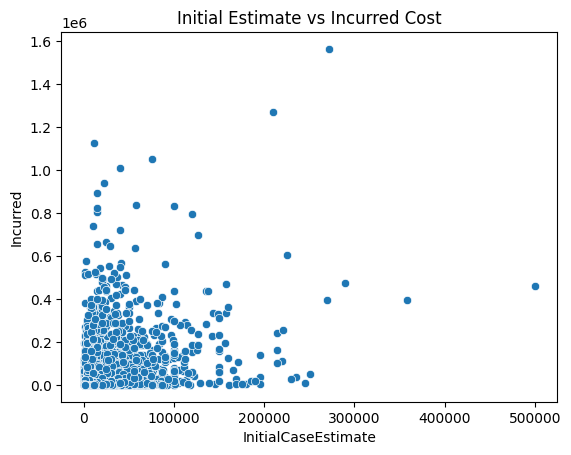

Pearson correlation: 0.4192


In [124]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot
sns.scatterplot(x='InitialCaseEstimate', y='Incurred', data=df)
plt.title('Initial Estimate vs Incurred Cost')
plt.show()

# Pearson correlation
corr = df['InitialCaseEstimate'].corr(df['Incurred'])
print(f"Pearson correlation: {corr:.4f}")


In [125]:
df['EstimateGap'] = df['Incurred'] - df['InitialCaseEstimate']
df['EstimateAccuracy'] = df['EstimateGap'].apply(
    lambda x: 'Underestimated' if x > 0 else ('Overestimated' if x < 0 else 'Accurate')
)

# Summary
print(df['EstimateAccuracy'].value_counts())


EstimateAccuracy
Overestimated     17212
Underestimated     4470
Accurate              4
Name: count, dtype: int64


In [126]:
df['Severity'] = pd.qcut(df['Incurred'], q=3, labels=['Low', 'Medium', 'High'])

# Group by severity
severity_gap = df.groupby('Severity')['EstimateGap'].agg(['mean', 'median', 'std'])
print(severity_gap)


                  mean      median           std
Severity                                        
Low       -1606.209979 -437.481473   3813.978432
Medium    -3311.736881 -765.834322   6395.402328
High      13697.391219 -725.270000  73011.970854


C:\Users\Aeiman Imtiaz\AppData\Local\Temp\ipykernel_13496\3615441774.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  severity_gap = df.groupby('Severity')['EstimateGap'].agg(['mean', 'median', 'std'])


In [127]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.stats import spearmanr
import pandas as pd

# Fill missing descriptions
df['ClaimDescription'] = df['ClaimDescription'].fillna('')

# Vectorize text
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['ClaimDescription'])

# Convert to DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Compute correlation with Incurred
word_correlations = {}
for word in tfidf_df.columns:
    corr, _ = spearmanr(tfidf_df[word], df['Incurred'])
    word_correlations[word] = corr

# Sort by correlation
word_corr_series = pd.Series(word_correlations).sort_values()

# Get top N high and low correlation words
low_risk_words = set(word_corr_series.head(15).index)
high_risk_words = set(word_corr_series.tail(15).index)


In [128]:
# Add EstimateGap
df['EstimateGap'] = df['Incurred'] - df['InitialCaseEstimate']

def contains_keywords(text, keywords):
    if not isinstance(text, str): return False
    text = text.lower()
    return any(word in text for word in keywords)

def classify_severity(row):
    incurred = row['Incurred']
    gap = row['EstimateGap']
    delay = row['ReportingDelay']
    text = row['ClaimDescription']

    # High severity
    if (
        incurred > df['Incurred'].quantile(0.75) or
        gap > 10000 or
        delay > 10 or
        contains_keywords(text, high_risk_words)
    ):
        return 'High'

    # Low severity
    elif (
        incurred < df['Incurred'].quantile(0.25) and
        gap >= -500 and
        contains_keywords(text, low_risk_words)
    ):
        return 'Low'

    # Medium otherwise
    return 'Medium'

df['SeverityLabel'] = df.apply(classify_severity, axis=1)


In [132]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.stats import spearmanr

# Step 0: Prepare required fields
df['EstimateGap'] = df['Incurred'] - df['InitialCaseEstimate']
df['ClaimDescription'] = df['ClaimDescription'].fillna('')
df['ReportingDelay'] = df['ReportingDelay'].fillna(0)

# Step 1: Identify high-risk and low-risk keywords using TF-IDF correlation
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['ClaimDescription'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

word_correlations = {}
for word in tfidf_df.columns:
    corr, _ = spearmanr(tfidf_df[word], df['Incurred'])
    word_correlations[word] = corr

word_corr_series = pd.Series(word_correlations).sort_values()
low_risk_words = set(word_corr_series.head(20).index)
high_risk_words = set(word_corr_series.tail(20).index)

def match_keywords(text, keywords):
    text = text.lower()
    return any(word in text for word in keywords)

df['HasHighRiskWord'] = df['ClaimDescription'].apply(lambda x: match_keywords(x, high_risk_words))
df['HasLowRiskWord'] = df['ClaimDescription'].apply(lambda x: match_keywords(x, low_risk_words))

# Step 2: Quantile-based binning
df['IncurredQuantile'] = pd.qcut(df['Incurred'], q=3, labels=['LowCost', 'MediumCost', 'HighCost'])
df['DelayQuantile'] = pd.qcut(df['ReportingDelay'], q=3, labels=['ShortDelay', 'ModerateDelay', 'LongDelay'])
df['EstimateCategory'] = pd.cut(df['EstimateGap'], 
                                bins=[-np.inf, -1000, 1000, np.inf], 
                                labels=['Overestimated', 'Accurate', 'Underestimated'])

# Step 3: Rule matrix using group-based logic
def determine_severity(row):
    if (
        row['IncurredQuantile'] == 'HighCost' #or
        # row['EstimateCategory'] == 'Underestimated' or
        # row['DelayQuantile'] == 'LongDelay' or
        # row['HasHighRiskWord']
    ):
        return 'High'
    elif (
         row['IncurredQuantile'] == 'LowCost' #and
        # row['EstimateCategory'] != 'Underestimated' or
        # row['HasLowRiskWord']
    ):
        return 'Low'
    elif(
        row['IncurredQuantile'] == 'MediumCost' #or
        # row['EstimateCategory'] == 'Accurate'         
    ):
        return 'Medium'

df['SeverityLabel'] = df.apply(determine_severity, axis=1)


In [133]:
# Count the number of claims in each severity category
severity_counts = df['SeverityLabel'].value_counts()
print(severity_counts)


SeverityLabel
Low       7229
High      7229
Medium    7228
Name: count, dtype: int64


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21686 entries, 0 to 21690
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ReportingDelay       21686 non-null  int64   
 1   AccidentHour         21686 non-null  int64   
 2   Age                  21686 non-null  int64   
 3   WeeklyRate           21686 non-null  float64 
 4   Gender               21686 non-null  object  
 5   MaritalStatus        21664 non-null  object  
 6   HoursWorkedPerWeek   21686 non-null  float64 
 7   DependentChildren    21686 non-null  int64   
 8   DependentsOther      21686 non-null  int64   
 9   PartTimeFullTime     21686 non-null  object  
 10  DaysWorkedPerWeek    21686 non-null  int64   
 11  DateOfAccident       21686 non-null  object  
 12  ClaimDescription     21686 non-null  object  
 13  ReportedDay          21686 non-null  object  
 14  InitialCaseEstimate  21686 non-null  int64   
 15  Incurred             216